In [ ]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
# from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd
import basicfunc as bbb

importlib.reload(bbb)

In [2]:
k = 2

# calibrazione

In [3]:
D1 = uproot.open('data_imaging\\group23_22Na_D1_10min_definitivo\\RAW\\DataR_CH0@DT5720B_781_group23_22Na_D1_10min_definitivo.root')
D2 = uproot.open('data_imaging\\group23_22Na_D2_10min_definitivo_sicuri\\RAW\\DataR_CH1@DT5720B_781_group23_22Na_D2_10min_definitivo_sicuri.root')
D3 = uproot.open('data_imaging\\group23_22Na_D3_10min_def\\RAW\\DataR_CH2@DT5720B_781_group23_22Na_D3_10min_def.root')
D4 = uproot.open('data_imaging\\group23_22Na_D4_10min_def\\RAW\\DataR_CH3@DT5720B_781_group23_22Na_D4_10min_def.root')
D5 = uproot.open('data_imaging\\group23_22Na_D5_10min_def\\RAW\\DataR_CH0@DT5720B_467_group23_22Na_D5_10min_def.root')
D6 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH1@DT5720B_467_group23_22Na_D6_10min_def.root')
D7 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH2@DT5720B_467_group23_22Na_D6_10min_def.root')
D8 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH3@DT5720B_467_group23_22Na_D6_10min_def.root')

In [4]:
d1 = np.asarray(D1['Data_R;1']['Energy'].array())
d2 = np.asarray(D2['Data_R;2']['Energy'].array())
d3 = np.asarray(D3['Data_R;2']['Energy'].array())
d4 = np.asarray(D4['Data_R;2']['Energy'].array())
d5 = np.asarray(D5['Data_R;3']['Energy'].array())
d6 = np.asarray(D6['Data_R;3']['Energy'].array())
d7 = np.asarray(D7['Data_R;2']['Energy'].array())
d8 = np.asarray(D8['Data_R;2']['Energy'].array())


In [ ]:
plt.hist(d1, bins=int(d1.max()), histtype='step', label='D1')
plt.hist(d2, bins=int(d2.max()), histtype='step', label='D2')
plt.hist(d3, bins=int(d3.max()), histtype='step', label='D3')
plt.hist(d4, bins=int(d4.max()), histtype='step', label='D4')
plt.hist(d5, bins=int(d5.max()), histtype='step', label='D5')
plt.hist(d6, bins=int(d6.max()), histtype='step', label='D6')
plt.hist(d7, bins=int(d7.max()), histtype='step', label='D7')
plt.hist(d8, bins=int(d8.max()), histtype='step', label='D8')
plt.axvline(x=22.5, color='red')
# plt.axvline(x=50, color='red')
plt.title(r'Uncalibrated $^{22}$Na spectra of the different detectors')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.ylim(0, 42000)
plt.xlim(0, 1300)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/uncalibrated_spectra.pdf',  format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
print('D1 \nCompton')
# d1normCom = bbb.normal(d1, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the of $^{22}$Na', xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2)
print('Primo picco:')
d1norm1 = bbb.normal(d1, xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=k)
print('Secondo picco:')
d1norm2 = bbb.normal(d1, xmin=1400, xmax=2000, x1=0, x2=3000, b=int(d1.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D2 \nPrimo picco')
d2norm1 = bbb.normal(d2, xmin=600, xmax=950, x1=0, x2=3000, b=int(d2.max()), n=k)
print('Secondo picco')
d2norm2 = bbb.normal(d2,  xmin=1750, xmax=2300, x1=0, x2=3000, b=int(d2.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D3 \nPrimo Picco')
d3norm1 = bbb.normal(d3, xmin=170, xmax=300, x1=0, x2=3000, b=int(d3.max()), n=k)
print('Secondo picco')
d3norm2 = bbb.normal(d3, xmin=520, xmax=700, x1=0, x2=3000, b=int(d3.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D4 \nPrimo picco')
d4norm1 = bbb.normal(d4, xmin=320, xmax=570, x1=0, x2=3000, b=int(d4.max()), n=k)
print('Secondo picco')
d4norm2 = bbb.normal(d4, xmin=1000, xmax=1350, x1=0, x2=3000, b=int(d4.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d5norm1 = bbb.normal(d5, xmin=150, xmax=300, x1=0, x2=3000, b=int(d5.max()), n=k)
print('Secondo picco')
d5norm2 = bbb.normal(d5, xmin=480, xmax=680, x1=0, x2=3000, b=int(d5.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D6 \nPrimo picco')
d6norm1 = bbb.normal(d6, xmin=350, xmax=580, x1=0, x2=3000, b=int(d6.max()), n=k)
print('Secondo picco')
d6norm2 = bbb.normal(d6, xmin=1100, xmax=1450, x1=0, x2=3000, b=int(d6.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D7 \nPrimo picco')
d7norm1 = bbb.normal(d7, xmin=140, xmax=200, x1=200, x2=300, b=int(d7.max()), n=k)
print('Secondo picco')
d7norm2 = bbb.normal(d7, xmin=400, xmax=550, x1=350, x2=700, b=int(d7.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D8 \nPrimo picco')
d8norm1 = bbb.normal(d8, xmin=110, xmax=200, x1=50, x2=250, b=int(d8.max()), n=k)
print('Secondo picco')
d8norm2 = bbb.normal(d8, xmin=300, xmax=450, x1=200, x2=500, b=int(d8.max()), n=k)

In [ ]:
y_calib = np.array([511, 1275]) #KeV
#__________________________________________________________________________________________________________
xD1 = np.array([d1norm1[0][1], d1norm2[0][1]])
sxD1 = np.array([d1norm1[1][1], d1norm2[1][1],])
calibrazioneD1 = bbb.linear_regression(xD1, y_calib, sx=sxD1, sy = None)
print('__________________________________________________________________________________________________________')
xD2 = np.array([d2norm1[0][1], d2norm2[0][1]])
sxD2 = np.array([d2norm1[1][1], d2norm2[1][1],])
calibrazioneD2 = bbb.linear_regression(xD2, y_calib, sx=sxD2, sy = None)
print('__________________________________________________________________________________________________________')
xD3 = np.array([d3norm1[0][1], d3norm2[0][1]])
sxD3 = np.array([d3norm1[1][1], d3norm2[1][1],])
calibrazioneD3 = bbb.linear_regression(xD3, y_calib, sx=sxD3, sy = None)
print('__________________________________________________________________________________________________________')
xD4 = np.array([d4norm1[0][1], d4norm2[0][1]])
sxD4 = np.array([d4norm1[1][1], d4norm2[1][1],])
calibrazioneD4 = bbb.linear_regression(xD4, y_calib, sx=sxD4, sy = None)
print('__________________________________________________________________________________________________________')
xD5 = np.array([d5norm1[0][1], d5norm2[0][1]])
sxD5 = np.array([d5norm1[1][1], d5norm2[1][1],])
calibrazioneD5 = bbb.linear_regression(xD5, y_calib, sx=sxD5, sy = None)
print('__________________________________________________________________________________________________________')
xD6 = np.array([d6norm1[0][1], d6norm2[0][1]])
sxD6 = np.array([d6norm1[1][1], d6norm2[1][1],])
calibrazioneD6 = bbb.linear_regression(xD6, y_calib, sx=sxD6, sy = None)
print('__________________________________________________________________________________________________________')
xD7 = np.array([d7norm1[0][1], d7norm2[0][1]])
sxD7 = np.array([d7norm1[1][1], d7norm2[1][1],])
calibrazioneD7 = bbb.linear_regression(xD7, y_calib, sx=sxD7, sy = None)
print('__________________________________________________________________________________________________________')
xD8 = np.array([d8norm1[0][1], d8norm2[0][1]])
sxD8 = np.array([d8norm1[1][1], d8norm2[1][1],])
calibrazioneD8 = bbb.linear_regression(xD8, y_calib, sx=sxD8, sy = None)


In [ ]:
# Lista degli array
arr_x = [xD1, xD2, xD3, xD4, xD5, xD6, xD7, xD8]
arr_sx = [sxD1, sxD2, sxD3, sxD4, sxD5, sxD6, sxD7, sxD8]
arr_y = [y_calib, y_calib, y_calib, y_calib, y_calib, y_calib, y_calib, y_calib]
# Creazione del nuovo array
x = np.array([elem for arr in arr_x for elem in arr])
sx = np.array([elem for arr in arr_sx for elem in arr])
y = np.array([elem for arr in arr_y for elem in arr])
x_fit = np.linspace(0, 2100, 1000)
# plt.figure(figsize=(7, 5))
plt.errorbar(x, y, xerr=sx, fmt='o', color='black', markersize=3, capsize=1.5)
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD1[0], calibrazioneD1[1]), label='D1')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD2[0], calibrazioneD2[1]), label='D2')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD3[0], calibrazioneD3[1]), label='D3')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD4[0], calibrazioneD4[1]), label='D4')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD5[0], calibrazioneD5[1]), label='D5')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD6[0], calibrazioneD6[1]), label='D6')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD7[0], calibrazioneD7[1]), label='D7')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD8[0], calibrazioneD8[1]), label='D8')
plt.title('Overview of the calibration fits')
plt.xlabel('ADC chanels')
plt.ylabel('Energy [KeV]')
plt.ylim(0, 5000)
plt.xlim(100, 1300)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/calib_fit_tutti.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
d1_calib = d1*calibrazioneD1[0]+calibrazioneD1[1]
print('Primo picco:')
d1_calibb_norm1 = bbb.normal(d1_calib, xmin=480, xmax=660, x1=0, x2=3000, b=int(d1.max()), n=k)

plt.hist(d1_calib, bins=int(d1.max()), histtype='step', label='D1')
plt.axvline(x=511, color='red')
plt.axvline(x=1275, color='red')
plt.title(r'Calibrated spectra of $^{22}$Na')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 1500)
plt.xlim(200, 900)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [ ]:
d7_calib = d7*calibrazioneD7[0]+calibrazioneD7[1]
plt.hist(d7_calib, bins=int(d1.max()), histtype='step', label='D7')
plt.axvline(x=511, color='red')
plt.axvline(x=1275, color='red')
plt.title(r'Calibrated spectra of $^{22}$Na')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 2500)
plt.xlim(250, 1600)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# samples

In [11]:
l = 250 #mm
h = 15 #mm
g = 5 #mm
# s = np.array([5*h/2+3*g, 3*h/2+2*g, h/2+g, -h/2, -3*h/2+g, -5*h/2-2*g, -7*h/2-3*g]) #allineamento con d5
s = np.array([5*g+9*h/2, 4*g+7*h/2, 3*g+5*h/2, 2*g+3*h/2, g+h/2, -h/2, -g-3*h/2]) #allineamento a d7
theta_max = []
theta_min = []
for i in range(7):
    theta_max.append(np.arctan((s[i]+h)/l))
    theta_min.append(np.arctan(s[i]/l))
theta_max = np.array(theta_max)
theta_min = np.array(theta_min)
x0_lead = 5 #mm
x0_pol = 20 #mm
x0_alu = 20 #mm
x0_iron = 10 #mm
x0_graph = 20 #mm 
x_eff_lead = x0_lead/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_pol = x0_pol/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_alu = x0_alu/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_iron = x0_iron/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_graph= x0_graph/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))


## HOME

In [12]:
home_d1 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_781_group23_home_30min.root')
home_d2 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_781_group23_home_30min.root')
home_d3 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_781_group23_home_30min.root')
home_d4 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_781_group23_home_30min.root')
home_d5 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_467_group23_home_30min.root')
home_d6 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_467_group23_home_30min.root')
home_d7 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_467_group23_home_30min.root')
home_d8 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_467_group23_home_30min.root')

In [13]:
hm_d1 = np.asarray(home_d1['Data_R;1']['Energy'].array())
hm_d1_calib = hm_d1 * calibrazioneD1[0] + calibrazioneD1[1]
hm_d1_def = hm_d1_calib[hm_d1_calib != 0]

hm_d2 = np.asarray(home_d2['Data_R;1']['Energy'].array())
hm_d2_calib = hm_d2 * calibrazioneD2[0] + calibrazioneD2[1]
hm_d2_def = hm_d2_calib[hm_d2_calib != 0]

hm_d3 = np.asarray(home_d3['Data_R;1']['Energy'].array())
hm_d3_calib = hm_d3 * calibrazioneD3[0] + calibrazioneD3[1]
hm_d3_def = hm_d3_calib[hm_d3_calib != 0]

hm_d4 = np.asarray(home_d4['Data_R;1']['Energy'].array())
hm_d4_calib = hm_d4 * calibrazioneD4[0] + calibrazioneD4[1]
hm_d4_def = hm_d4_calib[hm_d4_calib != 0]

hm_d5 = np.asarray(home_d5['Data_R;1']['Energy'].array())
hm_d5_calib = hm_d5 * calibrazioneD5[0] + calibrazioneD5[1]
hm_d5_def = hm_d5_calib[hm_d5_calib != 0]

hm_d6 = np.asarray(home_d6['Data_R;1']['Energy'].array())
hm_d6_calib = hm_d6 * calibrazioneD6[0] + calibrazioneD6[1]
hm_d6_def = hm_d6_calib[hm_d6_calib != 0]

hm_d7 = np.asarray(home_d7['Data_R;1']['Energy'].array())
hm_d7_calib = hm_d7 * calibrazioneD7[0] + calibrazioneD7[1]
hm_d7_def = hm_d7_calib[hm_d7_calib != 0]

hm_d8 = np.asarray(home_d8['Data_R;1']['Energy'].array())
hm_d8_calib = hm_d8 * calibrazioneD8[0] + calibrazioneD8[1]
hm_d8_def = hm_d8_calib[hm_d8_calib != 0]


In [ ]:
plt.hist(hm_d1_def, bins=int(hm_d1.max()), histtype='step', label='D1')
plt.hist(hm_d2_def, bins=int(hm_d2.max()), histtype='step', label='D2')
plt.hist(hm_d3_def, bins=int(hm_d3.max()), histtype='step', label='D3')
plt.hist(hm_d4_def, bins=int(hm_d4.max()), histtype='step', label='D4')
plt.hist(hm_d5_def, bins=int(hm_d5.max()), histtype='step', label='D5')
plt.hist(hm_d6_def, bins=int(hm_d6.max()), histtype='step', label='D6')
plt.hist(hm_d7_def, bins=int(hm_d7.max()), histtype='step', label='D7')
plt.hist(hm_d8_def, bins=int(hm_d8.max()), histtype='step', label='D8')
plt.axvline(x=511, color='red')
plt.title(r'Calibrated spectra without any sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 800)
plt.xlim(100, 1000)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calib_home.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
fit_hm_d1 = bbb.normal(hm_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(hm_d1_def.max()/10), n=k)
fit_hm_d2 = bbb.normal(hm_d2_def, xmin=400, xmax=600, x1=0, x2=1000, b=int(hm_d2_def.max()/10), n=k)
fit_hm_d3 = bbb.normal(hm_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(hm_d3_def.max()/10), n=k)
fit_hm_d4 = bbb.normal(hm_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(hm_d4_def.max()/10), n=k)
fit_hm_d5 = bbb.normal(hm_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(hm_d5_def.max()/10), n=k)
fit_hm_d6 = bbb.normal(hm_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(hm_d6_def.max()/10), n=k)
fit_hm_d7 = bbb.normal(hm_d7_def, xmin=400, xmax=600, x1=0, x2=1000, b=int(hm_d7_def.max()/10), n=k)
fit_hm_d8 = bbb.normal(hm_d8_def, xmin=350, xmax=680, x1=0, x2=1000, b=int(hm_d8_def.max()/10), n=k)

#integrals dal det2 al det6
hm_int = np.array([fit_hm_d2[5][0], fit_hm_d3[5][0], fit_hm_d4[5][0], fit_hm_d5[5][0], fit_hm_d6[5][0], fit_hm_d7[5][0], fit_hm_d8[5][0]])
hm_int_err = np.array([fit_hm_d2[5][1], fit_hm_d3[5][1], fit_hm_d4[5][1], fit_hm_d5[5][1], fit_hm_d6[5][1], fit_hm_d7[5][1], fit_hm_d8[5][1]])

## PIOMBO

In [16]:
piombo_d1 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d2 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d3 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d4 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d5 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d6 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d7 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d8 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')

In [17]:
pb_d1 = np.asarray(piombo_d1['Data_R;1']['Energy'].array())
pb_d1_calib = pb_d1*calibrazioneD1[0]+calibrazioneD1[1]
pb_d1_def = pb_d1_calib[pb_d1_calib != 0]

pb_d2 = np.asarray(piombo_d2['Data_R;1']['Energy'].array())
pb_d2_calib = pb_d2*calibrazioneD2[0]+calibrazioneD2[1]
pb_d2_def = pb_d2_calib[pb_d2_calib != 0]

pb_d3 = np.asarray(piombo_d3['Data_R;1']['Energy'].array())
pb_d3_calib = pb_d3 * calibrazioneD3[0] + calibrazioneD3[1]
pb_d3_def = pb_d3_calib[pb_d3_calib != 0]

pb_d4 = np.asarray(piombo_d4['Data_R;1']['Energy'].array())
pb_d4_calib = pb_d4 * calibrazioneD4[0] + calibrazioneD4[1]
pb_d4_def = pb_d4_calib[pb_d4_calib != 0]

pb_d5 = np.asarray(piombo_d5['Data_R;1']['Energy'].array())
pb_d5_calib = pb_d5 * calibrazioneD5[0] + calibrazioneD5[1]
pb_d5_def = pb_d5_calib[pb_d5_calib != 0]

pb_d6 = np.asarray(piombo_d6['Data_R;1']['Energy'].array())
pb_d6_calib = pb_d6 * calibrazioneD6[0] + calibrazioneD6[1]
pb_d6_def = pb_d6_calib[pb_d6_calib != 0]

pb_d7 = np.asarray(piombo_d7['Data_R;1']['Energy'].array())
pb_d7_calib = pb_d7 * calibrazioneD7[0] + calibrazioneD7[1]
pb_d7_def = pb_d7_calib[pb_d7_calib != 0]

pb_d8 = np.asarray(piombo_d8['Data_R;1']['Energy'].array())
pb_d8_calib = pb_d8 * calibrazioneD8[0] + calibrazioneD8[1]
pb_d8_def = pb_d8_calib[pb_d8_calib != 0]

In [ ]:
plt.hist(pb_d1_def, bins=int(pb_d1.max()), histtype='step', label='D1')
plt.hist(pb_d2_def, bins=int(pb_d2.max()), histtype='step', label='D2')
plt.hist(pb_d3_def, bins=int(pb_d3.max()), histtype='step', label='D3')
plt.hist(pb_d4_def, bins=int(pb_d4.max()), histtype='step', label='D4')
plt.hist(pb_d5_def, bins=int(pb_d5.max()), histtype='step', label='D5')
plt.hist(pb_d6_def, bins=int(pb_d6.max()), histtype='step', label='D6')
plt.hist(pb_d7_def, bins=int(pb_d7.max()), histtype='step', label='D7')
plt.hist(pb_d8_def, bins=int(pb_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the lead sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 400)
plt.xlim(300, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_lead.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
fit_pb_d1 = bbb.normal(pb_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(pb_d1_def.max()/10), n=k)
fit_pb_d2 = bbb.normal(pb_d2_def, xmin=380, xmax=600, x1=0, x2=1000, b=int(pb_d2_def.max()/10), n=k)
fit_pb_d3 = bbb.normal(pb_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(pb_d3_def.max()/10), n=k)
fit_pb_d4 = bbb.normal(pb_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(pb_d4_def.max()/10), n=k)
fit_pb_d5 = bbb.normal(pb_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(pb_d5_def.max()/10), n=k)
fit_pb_d6 = bbb.normal(pb_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(pb_d6_def.max()/10), n=k)
fit_pb_d7 = bbb.normal(pb_d7_def, xmin=410, xmax=620, x1=0, x2=1000, b=int(pb_d7_def.max()/10), n=k)
fit_pb_d8 = bbb.normal(pb_d8_def, xmin=350, xmax=680, x1=0, x2=1000, b=int(pb_d8_def.max()/10), n=k)

#integrals dal det2 al det8
pb_int = np.array([fit_pb_d2[5][0], fit_pb_d3[5][0], fit_pb_d4[5][0], fit_pb_d5[5][0], fit_pb_d6[5][0], fit_pb_d7[5][0], fit_pb_d8[5][0]])
pb_int_err = np.array([fit_pb_d2[5][1], fit_pb_d3[5][1], fit_pb_d4[5][1], fit_pb_d5[5][1], fit_pb_d6[5][1], fit_pb_d7[5][1], fit_pb_d8[5][1]])

In [ ]:
#CALCOLO COEFFICIENTE ATTENUAZIONE PIOMBO
rho_pb = 0.01135 #g/mm^3
mu_pb = -(np.log(pb_int/hm_int))/(x_eff_lead*rho_pb) #mm^2/g
mu_pb_err = 1/(x_eff_lead*rho_pb) * np.sqrt((pb_int_err/pb_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
pb_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_pb)):
    for j in range(len(mu_pb)):
        if j == i:
            pb_compat_crossed[i, j] = ''
        else:
            pb_compat_crossed[i, j] = np.abs(mu_pb[i]-mu_pb[j])/np.sqrt(mu_pb_err[i]**2 + mu_pb_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(pb_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso_pb = 16.14 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
pb_compat = np.abs(mu_pb-mu_atteso_pb)/mu_pb_err
print('\n')
for i in range(len(mu_pb)):
    print(f'mu{i+2} = {mu_pb[i]:.2f} ± {mu_pb_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {pb_compat[i]}')
print('\n')
# for i in range(len(mu_pb)):
#         print(f'mu{i+2} = {10 * rho_pb * mu_pb[i]:.4f} ± {10 * rho_pb * mu_pb_err[i]:.4f} cm^(-1)')


In [ ]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_pb = 0
somma_pb_err = 0
for i in range(1, len(mu_pb)):
    somma_pb += mu_pb[i]/mu_pb_err[i]**2
    somma_pb_err +=1/mu_pb_err[i]**2

mu_pb_fin = somma_pb/somma_pb_err
mu_pb_err_fin = np.sqrt(1/somma_pb_err)

print(f'mu pesato piombo = {mu_pb_fin:.2f} più o meno {mu_pb_err_fin:.2f}')

## POLIETILENE (maybe PMMA)

In [22]:
polyeth_d1 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d2 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d3 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d4 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d5 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')
polyeth_d6 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')
polyeth_d7 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')
polyeth_d8 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')

In [23]:
poly_d1 = np.asarray(polyeth_d1['Data_R;1']['Energy'].array())
poly_d1_calib = poly_d1*calibrazioneD1[0]+calibrazioneD1[1]
poly_d1_def = poly_d1_calib[poly_d1_calib != 0]

poly_d2 = np.asarray(polyeth_d2['Data_R;1']['Energy'].array())
poly_d2_calib = poly_d2*calibrazioneD2[0]+calibrazioneD2[1]
poly_d2_def = poly_d2_calib[poly_d2_calib != 0]

poly_d3 = np.asarray(polyeth_d3['Data_R;1']['Energy'].array())
poly_d3_calib = poly_d3 * calibrazioneD3[0] + calibrazioneD3[1]
poly_d3_def = poly_d3_calib[poly_d3_calib != 0]

poly_d4 = np.asarray(polyeth_d4['Data_R;1']['Energy'].array())
poly_d4_calib = poly_d4 * calibrazioneD4[0] + calibrazioneD4[1]
poly_d4_def = poly_d4_calib[poly_d4_calib != 0]

poly_d5 = np.asarray(polyeth_d5['Data_R;1']['Energy'].array())
poly_d5_calib = poly_d5 * calibrazioneD5[0] + calibrazioneD5[1]
poly_d5_def = poly_d5_calib[poly_d5_calib != 0]

poly_d6 = np.asarray(polyeth_d6['Data_R;1']['Energy'].array())
poly_d6_calib = poly_d6 * calibrazioneD6[0] + calibrazioneD6[1]
poly_d6_def = poly_d6_calib[poly_d6_calib != 0]

poly_d7 = np.asarray(polyeth_d7['Data_R;1']['Energy'].array())
poly_d7_calib = poly_d7 * calibrazioneD7[0] + calibrazioneD7[1]
poly_d7_def = poly_d7_calib[poly_d7_calib != 0]

poly_d8 = np.asarray(polyeth_d8['Data_R;1']['Energy'].array())
poly_d8_calib = poly_d8 * calibrazioneD8[0] + calibrazioneD8[1]
poly_d8_def = poly_d8_calib[poly_d8_calib != 0]

In [ ]:
plt.hist(poly_d1_def, bins=int(poly_d1.max()), histtype='step', label='D1')
plt.hist(poly_d2_def, bins=int(poly_d2.max()), histtype='step', label='D2')
plt.hist(poly_d3_def, bins=int(poly_d3.max()), histtype='step', label='D3')
plt.hist(poly_d4_def, bins=int(poly_d4.max()), histtype='step', label='D4')
plt.hist(poly_d5_def, bins=int(poly_d5.max()), histtype='step', label='D5')
plt.hist(poly_d6_def, bins=int(poly_d6.max()), histtype='step', label='D6')
plt.hist(poly_d7_def, bins=int(poly_d7.max()), histtype='step', label='D7')
plt.hist(poly_d8_def, bins=int(poly_d8.max()), histtype='step', label='D8')
# plt.axvline(x=511, color='red')
plt.title(r'Calibrated spectra with the polyethylene sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 550)
plt.xlim(300, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_poly.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
print('Detector D1: ------------------ ')
fit_poly_d1 = bbb.normal(poly_d1_def, xmin=500, xmax=660, x1=0, x2=1000, b=int(poly_d1_def.max()/10), n=k)
print('Detector D2: ------------------ ')
fit_poly_d2 = bbb.normal(poly_d2_def, xmin=380, xmax=640, x1=0, x2=1000, b=int(poly_d2_def.max()/10), n=k)
print('Detector D3: ------------------ ')
fit_poly_d3 = bbb.normal(poly_d3_def, xmin=450, xmax=700, x1=0, x2=1000, b=int(poly_d3_def.max()/10), n=k)
print('Detector D4: ------------------ ')
fit_poly_d4 = bbb.normal(poly_d4_def, xmin=450, xmax=680, x1=0, x2=1000, b=int(poly_d4_def.max()/10), n=k)
print('Detector D5: ------------------ ')
fit_poly_d5 = bbb.normal(poly_d5_def, xmin=380, xmax=680, x1=0, x2=1000, b=int(poly_d5_def.max()/10), n=k)
print('Detector D6: ------------------ ')
fit_poly_d6 = bbb.normal(poly_d6_def, xmin=430, xmax=600, x1=0, x2=1000, b=int(poly_d6_def.max()/10), n=k)
print('Detector D7: ------------------ ')
fit_poly_d7 = bbb.normal(poly_d7_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(poly_d7_def.max()/10), n=k)
print('Detector D8: ------------------ ')
fit_poly_d8 = bbb.normal(poly_d8_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(poly_d8_def.max()/10), n=k)

#integrals dal det2 al det8
poly_int = np.array([fit_poly_d2[5][0], fit_poly_d3[5][0], fit_poly_d4[5][0], fit_poly_d5[5][0], fit_poly_d6[5][0], fit_poly_d7[5][0], fit_poly_d8[5][0]])
poly_int_err = np.array([fit_poly_d2[5][1], fit_poly_d3[5][1], fit_poly_d4[5][1], fit_poly_d5[5][1], fit_poly_d6[5][1], fit_poly_d7[5][1], fit_poly_d8[5][1]])

In [ ]:
#CALCOLO COEFFICIENTE ATTENUAZIONE POLIETILENE
# rho_poly = 9.300E-04 #g/mm^3 Polietilene 
rho_poly = 1.190E-03 #g/mm^3 PMMA
mu_poly = -(np.log(poly_int/hm_int))/(x_eff_pol*rho_poly) #mm^2/g
mu_poly_err = 1/(x_eff_pol*rho_poly) * np.sqrt((poly_int_err/poly_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
poly_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_poly)):
    for j in range(len(mu_poly)):
        if j == i:
            poly_compat_crossed[i, j] = ''
        else:
            poly_compat_crossed[i, j] = np.abs(mu_poly[i]-mu_poly[j])/np.sqrt(mu_poly_err[i]**2 + mu_poly_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(poly_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
# mu_atteso_poly = 9.947 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
mu_atteso_poly = 9.410 #mm^2/g PMMA
poly_compat = np.abs(mu_poly-mu_atteso_poly)/mu_poly_err
print('\n')
for i in range(len(mu_poly)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_poly[i]:.2f} ± {mu_poly_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {poly_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_poly[i]:.2f} ± {mu_poly_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {poly_compat[i]}')
print('\n')
print(f'mu atteso pmma = {mu_atteso_poly * 10 * rho_poly} cm^(-1)')
print('\n')
for i in range(len(mu_poly)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_poly * mu_poly[i]:.4f} ± {10 * rho_poly * mu_poly_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_poly * mu_poly[i]:.4f} ± {10 * rho_poly * mu_poly_err[i]:.4f} cm^(-1)')

In [ ]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_poly = 0
somma_poly_err = 0
for i in range(1, len(mu_poly)):
    somma_poly += mu_poly[i]/mu_poly_err[i]
    somma_poly_err +=1/mu_poly_err[i]

mu_poly_fin = somma_poly/somma_poly_err
mu_poly_err_fin = np.sqrt(1/somma_poly_err)

print(f'mu pesato polietilene = {mu_poly_fin:.2f} più o meno {mu_poly_err_fin:.2f}')

## FERRO

In [28]:
iron_d1 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_iron_31500+22500forward.root')
iron_d2 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_iron_31500+22500forward.root')
iron_d3 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_iron_31500+22500forward.root')
iron_d4 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_iron_31500+22500forward.root')
iron_d5 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_iron_31500+22500forward.root')
iron_d6 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_iron_31500+22500forward.root')
iron_d7 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_iron_31500+22500forward.root')
iron_d8 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_iron_31500+22500forward.root')

In [29]:
iron_d1 = np.asarray(iron_d1['Data_R;1']['Energy'].array())
iron_d1_calib = iron_d1*calibrazioneD1[0]+calibrazioneD1[1]
iron_d1_def = iron_d1_calib[iron_d1_calib != 0]

iron_d2 = np.asarray(iron_d2['Data_R;1']['Energy'].array())
iron_d2_calib = iron_d2*calibrazioneD2[0]+calibrazioneD2[1]
iron_d2_def = iron_d2_calib[iron_d2_calib != 0]

iron_d3 = np.asarray(iron_d3['Data_R;1']['Energy'].array())
iron_d3_calib = iron_d3 * calibrazioneD3[0] + calibrazioneD3[1]
iron_d3_def = iron_d3_calib[iron_d3_calib != 0]

iron_d4 = np.asarray(iron_d4['Data_R;1']['Energy'].array())
iron_d4_calib = iron_d4 * calibrazioneD4[0] + calibrazioneD4[1]
iron_d4_def = iron_d4_calib[iron_d4_calib != 0]

iron_d5 = np.asarray(iron_d5['Data_R;1']['Energy'].array())
iron_d5_calib = iron_d5 * calibrazioneD5[0] + calibrazioneD5[1]
iron_d5_def = iron_d5_calib[iron_d5_calib != 0]

iron_d6 = np.asarray(iron_d6['Data_R;1']['Energy'].array())
iron_d6_calib = iron_d6 * calibrazioneD6[0] + calibrazioneD6[1]
iron_d6_def = iron_d6_calib[iron_d6_calib != 0]

iron_d7 = np.asarray(iron_d7['Data_R;1']['Energy'].array())
iron_d7_calib = iron_d7 * calibrazioneD7[0] + calibrazioneD7[1]
iron_d7_def = iron_d7_calib[iron_d7_calib != 0]

iron_d8 = np.asarray(iron_d8['Data_R;1']['Energy'].array())
iron_d8_calib = iron_d8 * calibrazioneD8[0] + calibrazioneD8[1]
iron_d8_def = iron_d8_calib[iron_d8_calib != 0]

In [ ]:
plt.hist(iron_d1_def, bins=int(iron_d1.max()), histtype='step', label='D1')
plt.hist(iron_d2_def, bins=int(iron_d2.max()), histtype='step', label='D2')
plt.hist(iron_d3_def, bins=int(iron_d3.max()), histtype='step', label='D3')
plt.hist(iron_d4_def, bins=int(iron_d4.max()), histtype='step', label='D4')
plt.hist(iron_d5_def, bins=int(iron_d5.max()), histtype='step', label='D5')
plt.hist(iron_d6_def, bins=int(iron_d6.max()), histtype='step', label='D6')
plt.hist(iron_d7_def, bins=int(iron_d7.max()), histtype='step', label='D7')
plt.hist(iron_d8_def, bins=int(iron_d8.max()), histtype='step', label='D8')
# plt.axvline(x=511, color='red')
plt.title(r'Calibrated spectra with the iron sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 180)
plt.xlim(300, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_iron.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
print('Detector D1: ------------------ ')
fit_iron_d1 = bbb.normal(iron_d1_def, xmin=500, xmax=660, x1=0, x2=1000, b=int(iron_d1_def.max()/10), n=k)
print('Detector D2: ------------------ ')
fit_iron_d2 = bbb.normal(iron_d2_def, xmin=400, xmax=640, x1=0, x2=1000, b=int(iron_d2_def.max()/10), n=k)
print('Detector D3: ------------------ ')
fit_iron_d3 = bbb.normal(iron_d3_def, xmin=450, xmax=680, x1=0, x2=1000, b=int(iron_d3_def.max()/10), n=k)
print('Detector D4: ------------------ ')
fit_iron_d4 = bbb.normal(iron_d4_def, xmin=450, xmax=690, x1=0, x2=1000, b=int(iron_d4_def.max()/10), n=k)
print('Detector D5: ------------------ ')
fit_iron_d5 = bbb.normal(iron_d5_def, xmin=400, xmax=690, x1=0, x2=1000, b=int(iron_d5_def.max()/10), n=k)
print('Detector D6: ------------------ ')
fit_iron_d6 = bbb.normal(iron_d6_def, xmin=410, xmax=600, x1=0, x2=1000, b=int(iron_d6_def.max()/10), n=k)
print('Detector D7: ------------------ ')
fit_iron_d7 = bbb.normal(iron_d7_def, xmin=410, xmax=680, x1=0, x2=1000, b=int(iron_d7_def.max()/10), n=k)
print('Detector D8: ------------------ ')
fit_iron_d8 = bbb.normal(iron_d8_def, xmin=400, xmax=690, x1=0, x2=1000, b=int(iron_d8_def.max()/10), n=k)

#integrals dal det2 al det8
iron_int = np.array([fit_iron_d2[5][0], fit_iron_d3[5][0], fit_iron_d4[5][0], fit_iron_d5[5][0], fit_iron_d6[5][0], fit_iron_d7[5][0], fit_iron_d8[5][0]])
iron_int_err = np.array([fit_iron_d2[5][1], fit_iron_d3[5][1], fit_iron_d4[5][1], fit_iron_d5[5][1], fit_iron_d6[5][1], fit_iron_d7[5][1], fit_iron_d8[5][1]])

In [ ]:
#CALCOLO COEFFICIENTE ATTENUAZIONE FERRO
rho_iron = 7.874E-03 #g/mm^3
mu_iron = -(np.log(iron_int/hm_int))/(x_eff_iron*rho_iron) #mm^2/g
mu_iron_err = 1/(x_eff_iron*rho_iron) * np.sqrt((iron_int_err/iron_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
iron_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_iron)):
    for j in range(len(mu_iron)):
        if j == i:
            iron_compat_crossed[i, j] = ''
        else:
            iron_compat_crossed[i, j] = np.abs(mu_iron[i]-mu_iron[j])/np.sqrt(mu_iron_err[i]**2 + mu_iron_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(iron_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso_iron = 8.414 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
# print('\n')
# print(f'mu_atteso (cm^(-1)) = {mu_atteso_iron * rho_iron * 10}')

iron_compat = np.abs(mu_iron-mu_atteso_iron)/mu_iron_err
print('\n')
for i in range(len(mu_iron)):
    if i == 0:
        print(f'mu{i+2} = {mu_iron[i]:.2f} ± {mu_iron_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {iron_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_iron[i]:.2f} ± {mu_iron_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {iron_compat[i]}')
print('\n')
for i in range(len(mu_iron)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_iron * mu_iron[i]:.4f} ± {10 * rho_iron * mu_iron_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_iron * mu_iron[i]:.4f} ± {10 * rho_iron * mu_iron_err[i]:.4f} cm^(-1)')

In [ ]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_iron = 0
somma_iron_err = 0
for i in range(1, len(mu_iron)):
    somma_iron += mu_iron[i]/mu_iron_err[i]
    somma_iron_err +=1/mu_iron_err[i]

mu_iron_fin = somma_iron/somma_iron_err
mu_iron_err_fin = np.sqrt(1/somma_iron_err)

print(f'mu pesato ferro = {mu_iron_fin:.2f} più o meno {mu_iron_err_fin:.2f}')

## ALLUMINIO

In [34]:
alluminio_d1 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH0@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d2 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH1@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d3 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH2@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d4 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH3@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d5 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH0@DT5720B_467_group23__30min_lead_21000forward.root')
alluminio_d6 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH1@DT5720B_467_group23__30min_lead_21000forward.root')
alluminio_d7 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH2@DT5720B_467_group23__30min_lead_21000forward.root')
alluminio_d8 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH3@DT5720B_467_group23__30min_lead_21000forward.root')

In [35]:
al_d1 = np.asarray(alluminio_d1['Data_R;1']['Energy'].array())
al_d1_calib = al_d1*calibrazioneD1[0]+calibrazioneD1[1]
al_d1_def = al_d1_calib[al_d1_calib != 0]

al_d2 = np.asarray(alluminio_d2['Data_R;1']['Energy'].array())
al_d2_calib = al_d2*calibrazioneD2[0]+calibrazioneD2[1]
al_d2_def = al_d2_calib[al_d2_calib != 0]

al_d3 = np.asarray(alluminio_d3['Data_R;1']['Energy'].array())
al_d3_calib = al_d3 * calibrazioneD3[0] + calibrazioneD3[1]
al_d3_def = al_d3_calib[al_d3_calib != 0]

al_d4 = np.asarray(alluminio_d4['Data_R;1']['Energy'].array())
al_d4_calib = al_d4 * calibrazioneD4[0] + calibrazioneD4[1]
al_d4_def = al_d4_calib[al_d4_calib != 0]

al_d5 = np.asarray(alluminio_d5['Data_R;1']['Energy'].array())
al_d5_calib = al_d5 * calibrazioneD5[0] + calibrazioneD5[1]
al_d5_def = al_d5_calib[al_d5_calib != 0]

al_d6 = np.asarray(alluminio_d6['Data_R;1']['Energy'].array())
al_d6_calib = al_d6 * calibrazioneD6[0] + calibrazioneD6[1]
al_d6_def = al_d6_calib[al_d6_calib != 0]

al_d7 = np.asarray(alluminio_d7['Data_R;1']['Energy'].array())
al_d7_calib = al_d7 * calibrazioneD7[0] + calibrazioneD7[1]
al_d7_def = al_d7_calib[al_d7_calib != 0]

al_d8 = np.asarray(alluminio_d8['Data_R;1']['Energy'].array())
al_d8_calib = al_d8 * calibrazioneD8[0] + calibrazioneD8[1]
al_d8_def = al_d8_calib[al_d8_calib != 0]


In [ ]:
plt.hist(al_d1_def, bins=int(al_d1.max()), histtype='step', label='D1')
plt.hist(al_d2_def, bins=int(al_d2.max()), histtype='step', label='D2')
plt.hist(al_d3_def, bins=int(al_d3.max()), histtype='step', label='D3')
plt.hist(al_d4_def, bins=int(al_d4.max()), histtype='step', label='D4')
plt.hist(al_d5_def, bins=int(al_d5.max()), histtype='step', label='D5')
plt.hist(al_d6_def, bins=int(al_d6.max()), histtype='step', label='D6')
plt.hist(al_d7_def, bins=int(al_d7.max()), histtype='step', label='D7')
plt.hist(al_d8_def, bins=int(al_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the aluminium sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 550)
plt.xlim(300, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_aluminum.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
fit_al_d1 = bbb.normal(al_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(al_d1_def.max()/10), n=k)
fit_al_d2 = bbb.normal(al_d2_def, xmin=380, xmax=590, x1=0, x2=1000, b=int(al_d2_def.max()/10), n=k)
fit_al_d3 = bbb.normal(al_d3_def, xmin=350, xmax=650, x1=0, x2=1000, b=int(al_d3_def.max()/10), n=k)
fit_al_d4 = bbb.normal(al_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(al_d4_def.max()/10), n=k)
fit_al_d5 = bbb.normal(al_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(al_d5_def.max()/10), n=k)
fit_al_d6 = bbb.normal(al_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(al_d6_def.max()/10), n=k)
fit_al_d7 = bbb.normal(al_d7_def, xmin=380, xmax=650, x1=0, x2=1000, b=int(al_d7_def.max()/10), n=k)
fit_al_d8 = bbb.normal(al_d8_def, xmin=400, xmax=850, x1=0, x2=1000, b=int(al_d8_def.max()/10), n=k)

#integrals dal det2 al det8
al_int = np.array([fit_al_d2[5][0], fit_al_d3[5][0], fit_al_d4[5][0], fit_al_d5[5][0], fit_al_d6[5][0], fit_al_d7[5][0], fit_al_d8[5][0]])
al_int_err = np.array([fit_al_d2[5][1], fit_al_d3[5][1], fit_al_d4[5][1], fit_al_d5[5][1], fit_al_d6[5][1], fit_al_d7[5][1], fit_al_d8[5][1]])

In [ ]:
#CALCOLO COEFFICIENTE ATTENUAZIONE ALLUMINIO
rho_al = 0.0027  #g/mm^3
mu_al = -(np.log(al_int/hm_int))/(x_eff_alu*rho_al) #mm^2/g
mu_al_err = 1/(x_eff_alu*rho_al) * np.sqrt((al_int_err/al_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
al_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_al)):
    for j in range(len(mu_al)):
        if j == i:
            al_compat_crossed[i, j] = ''
        else:
            al_compat_crossed[i, j] = np.abs(mu_al[i]-mu_al[j])/np.sqrt(mu_al_err[i]**2 + mu_al_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(al_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso_all = 8.445  #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
al_compat = np.abs(mu_al-mu_atteso_all)/mu_al_err
print('\n')
for i in range(len(mu_al)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_al[i]:.2f} ± {mu_al_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {al_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_al[i]:.2f} ± {mu_al_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {al_compat[i]}')

# print('\n')
# for i in range(len(mu_al)):
#     if i == 0:
#         print(f'mu{i+2} = {10 * rho_al * mu_al[i]:.4f} ± {10 * rho_al * mu_al_err[i]:.4f} cm^(-1)')
#     else:
#         print(f'mu{i+2} = {10 * rho_al * mu_al[i]:.4f} ± {10 * rho_al * mu_al_err[i]:.4f} cm^(-1)')


In [ ]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_al = 0
somma_al_err = 0
for i in range(1, len(mu_al)):
    somma_al += mu_al[i]/mu_al_err[i]
    somma_al_err +=1/mu_al_err[i]

mu_al_fin = somma_al/somma_al_err
mu_al_err_fin = np.sqrt(1/somma_al_err)

print(f'mu pesato alluminio = {mu_al_fin:.2f} più o meno {mu_al_err_fin:.2f}')

## GRAFITE

In [40]:
grafite_d1 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_graphite_31500forward.root')
grafite_d2 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_graphite_31500forward.root')
grafite_d3 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_graphite_31500forward.root')
grafite_d4 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_graphite_31500forward.root')
grafite_d5 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_graphite_31500forward.root')
grafite_d6 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_graphite_31500forward.root')
grafite_d7 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_graphite_31500forward.root')
grafite_d8 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_graphite_31500forward.root')


In [41]:
gr_d1 = np.asarray(grafite_d1['Data_R;1']['Energy'].array())
gr_d1_calib = gr_d1*calibrazioneD1[0]+calibrazioneD1[1]
gr_d1_def = gr_d1_calib[gr_d1_calib != 0]

gr_d2 = np.asarray(grafite_d2['Data_R;1']['Energy'].array())
gr_d2_calib = gr_d2*calibrazioneD2[0]+calibrazioneD2[1]
gr_d2_def = gr_d2_calib[gr_d2_calib != 0]

gr_d3 = np.asarray(grafite_d3['Data_R;1']['Energy'].array())
gr_d3_calib = gr_d3 * calibrazioneD3[0] + calibrazioneD3[1]
gr_d3_def = gr_d3_calib[gr_d3_calib != 0]

gr_d4 = np.asarray(grafite_d4['Data_R;1']['Energy'].array())
gr_d4_calib = gr_d4 * calibrazioneD4[0] + calibrazioneD4[1]
gr_d4_def = gr_d4_calib[gr_d4_calib != 0]

gr_d5 = np.asarray(grafite_d5['Data_R;1']['Energy'].array())
gr_d5_calib = gr_d5 * calibrazioneD5[0] + calibrazioneD5[1]
gr_d5_def = gr_d5_calib[gr_d5_calib != 0]

gr_d6 = np.asarray(grafite_d6['Data_R;1']['Energy'].array())
gr_d6_calib = gr_d6 * calibrazioneD6[0] + calibrazioneD6[1]
gr_d6_def = gr_d6_calib[gr_d6_calib != 0]

gr_d7 = np.asarray(grafite_d7['Data_R;1']['Energy'].array())
gr_d7_calib = gr_d7 * calibrazioneD7[0] + calibrazioneD7[1]
gr_d7_def = gr_d7_calib[gr_d7_calib != 0]

gr_d8 = np.asarray(grafite_d8['Data_R;1']['Energy'].array())
gr_d8_calib = gr_d8 * calibrazioneD8[0] + calibrazioneD8[1]
gr_d8_def = gr_d8_calib[gr_d8_calib != 0]


In [ ]:
plt.hist(gr_d1_def, bins=int(gr_d1.max()), histtype='step', label='D1')
plt.hist(gr_d2_def, bins=int(gr_d2.max()), histtype='step', label='D2')
plt.hist(gr_d3_def, bins=int(gr_d3.max()), histtype='step', label='D3')
plt.hist(gr_d4_def, bins=int(gr_d4.max()), histtype='step', label='D4')
plt.hist(gr_d5_def, bins=int(gr_d5.max()), histtype='step', label='D5')
plt.hist(gr_d6_def, bins=int(gr_d6.max()), histtype='step', label='D6')
plt.hist(gr_d7_def, bins=int(gr_d7.max()), histtype='step', label='D7')
plt.hist(gr_d8_def, bins=int(gr_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the graphite sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 240)
plt.xlim(300, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_graphite.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
fit_gr_d1 = bbb.normal(gr_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(gr_d1_def.max()/6), n=k)
fit_gr_d2 = bbb.normal(al_d2_def, xmin=380, xmax=600, x1=0, x2=1000, b=int(al_d2_def.max()/10), n=k)
fit_gr_d3 = bbb.normal(al_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(al_d3_def.max()/10), n=k)
fit_gr_d4 = bbb.normal(al_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(al_d4_def.max()/10), n=k)
fit_gr_d5 = bbb.normal(al_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(al_d5_def.max()/10), n=k)
fit_gr_d6 = bbb.normal(al_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(al_d6_def.max()/10), n=k)
fit_gr_d7 = bbb.normal(al_d7_def, xmin=380, xmax=650, x1=0, x2=1000, b=int(al_d7_def.max()/10), n=k)
fit_gr_d8 = bbb.normal(al_d8_def, xmin=400, xmax=850, x1=0, x2=1000, b=int(al_d8_def.max()/10), n=k)

#integrals dal det2 al det8
gr_int = np.array([fit_gr_d2[5][0], fit_gr_d3[5][0], fit_gr_d4[5][0], fit_gr_d5[5][0], fit_gr_d6[5][0], fit_gr_d7[5][0], fit_gr_d8[5][0]])
gr_int_err = np.array([fit_gr_d2[5][1], fit_gr_d3[5][1], fit_gr_d4[5][1], fit_gr_d5[5][1], fit_gr_d6[5][1], fit_gr_d7[5][1], fit_gr_d8[5][1]])

In [ ]:
#CALCOLO COEFFICIENTE ATTENUAZIONE GRAFITE
rho_gr = 0.0017 #g/mm^3
mu_gr = -(np.log(gr_int/hm_int))/(x_eff_graph*rho_al) #mm^2/g
mu_gr_err = 1/(x_eff_graph*rho_gr) * np.sqrt((gr_int_err/gr_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
gr_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_gr)):
    for j in range(len(mu_gr)):
        if j == i:
            gr_compat_crossed[i, j] = ''
        else:
            gr_compat_crossed[i, j] = np.abs(mu_gr[i]-mu_gr[j])/np.sqrt(mu_gr_err[i]**2 + mu_gr_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(gr_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso_gr = 8.715 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
gr_compat = np.abs(mu_gr-mu_atteso_gr)/mu_gr_err
print('\n')
for i in range(len(mu_gr)):
    if i == 0:
        print(f'mu{i+2} = {mu_gr[i]:.2f} ± {mu_gr_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {gr_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_gr[i]:.2f} ± {mu_gr_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {gr_compat[i]}')
print('\n')
for i in range(len(mu_gr)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_gr * mu_gr[i]:.4f} ± {10 * rho_gr * mu_gr_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_gr * mu_gr[i]:.4f} ± {10 * rho_gr * mu_gr_err[i]:.4f} cm^(-1)')


In [ ]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_gr = 0
somma_gr_err = 0
for i in range(1, len(mu_gr)):
    somma_gr += mu_gr[i]/mu_gr_err[i]
    somma_gr_err +=1/mu_gr_err[i]

mu_gr_fin = somma_gr/somma_gr_err
mu_gr_err_fin = np.sqrt(1/somma_gr_err)

print(f'mu pesato grafite = {mu_gr_fin:.2f} più o meno {mu_gr_err_fin:.2f}')

In [ ]:
print(f'mu pesato piombo = {mu_pb_fin:.2f} più o meno {mu_pb_err_fin:.2f}')
print(f'mu pesato alluminio = {mu_al_fin:.2f} più o meno {mu_al_err_fin:.2f}')
print(f'mu pesato polietilene = {mu_poly_fin:.2f} più o meno {mu_poly_err_fin:.2f}')
print(f'mu pesato grafite = {mu_gr_fin:.2f} più o meno {mu_gr_err_fin:.2f}')
print(f'mu pesato ferro = {mu_iron_fin:.2f} più o meno {mu_iron_err_fin:.2f}')

r_poly_true = np.abs(mu_poly_fin - mu_atteso_poly)/mu_poly_err_fin

r_poly_true


In [ ]:
#confronto d1
plt.hist(hm_d1_def, bins=int(hm_d1.max()), histtype='step', label=f'home {hm_d1_def.shape}')
plt.hist(pb_d1_def, bins=int(pb_d1.max()), histtype='step', label=f'lead {pb_d1_def.shape}')
plt.hist(poly_d1_def, bins=int(poly_d1.max()), histtype='step', label=f'pmma {poly_d1_def.shape}')
plt.hist(iron_d1_def, bins=int(iron_d1.max()), histtype='step', label=f'iron {iron_d1_def.shape}')
plt.hist(al_d1_def, bins=int(al_d1.max()), histtype='step', label=f'aluminum {al_d1_def.shape}')
plt.hist(gr_d1_def, bins=int(gr_d1.max()), histtype='step', label=f'graphite {gr_d1_def.shape}')
plt.title('D1 acquisition comparison')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.xlim(350, 700)
plt.ylim(0, 1000) 
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [ ]:
print(hm_d1_def.shape) 
print(pb_d1_def.shape) 
print(poly_d1_def.shape)
print(iron_d1_def.shape)
print(al_d1_def.shape) 
print(gr_d1_def.shape)

# black box

In [58]:
#posizione 1
d2_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d3_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d4_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d5_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d6_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d7_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d8_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')

#posizione 2
d2_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d3_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d4_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d5_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d6_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d7_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d8_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')

#posizione 3
d2_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d3_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d4_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d5_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d6_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d7_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d8_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')

#posizione 4
d2_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d3_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d4_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d5_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d6_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d7_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d8_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')

#posizione 5
# d2_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d3_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d4_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d5_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d6_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d7_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d8_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')

In [60]:
#creazione array adc channels
d2_1 = np.asarray(d2_pos1['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_2 = np.asarray(d2_pos2['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_3 = np.asarray(d2_pos3['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_4 = np.asarray(d2_pos4['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
  
 
d3_1 = np.asarray(d3_pos1['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_2 = np.asarray(d3_pos2['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_3 = np.asarray(d3_pos3['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_4 = np.asarray(d3_pos4['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_box_calib = [d3_1, d3_2, d3_3, d3_4 ]  
 
d4_1 = np.asarray(d4_pos1['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_2 = np.asarray(d4_pos2['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_3 = np.asarray(d4_pos3['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_4 = np.asarray(d4_pos4['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_box_calib = [d4_1, d4_2, d4_3, d4_4 ]  
 
d5_1 = np.asarray(d5_pos1['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_2 = np.asarray(d5_pos2['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_3 = np.asarray(d5_pos3['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_4 = np.asarray(d5_pos4['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_box_calib = [d5_1, d5_2, d5_3, d5_4 ]  
 
d6_1 = np.asarray(d6_pos1['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_2 = np.asarray(d6_pos2['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_3 = np.asarray(d6_pos3['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_4 = np.asarray(d6_pos4['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_box_calib = [d6_1, d6_2, d6_3, d6_4 ]  
 
d7_1 = np.asarray(d7_pos1['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_2 = np.asarray(d7_pos2['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_3 = np.asarray(d7_pos3['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_4 = np.asarray(d7_pos4['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_box_calib = [d7_1, d7_2, d7_3, d7_4 ]  
 
d8_1 = np.asarray(d8_pos1['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_2 = np.asarray(d8_pos2['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_3 = np.asarray(d8_pos3['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_4 = np.asarray(d8_pos4['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_box_calib = [d8_1, d8_2, d8_3, d8_4]


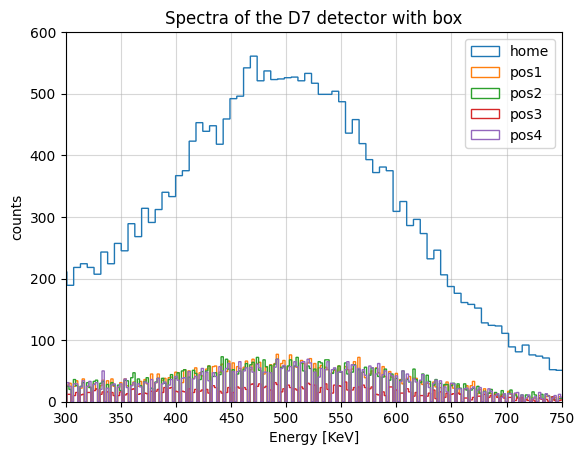

In [61]:
plt.hist(hm_d7_def, bins=int(hm_d7.max()/2), histtype='step', label='home')
plt.hist(d7_1, bins=int(d7_1.max()/2), histtype='step', label='pos1')
plt.hist(d7_2, bins=int(d7_2.max()/2), histtype='step', label='pos2')
plt.hist(d7_3, bins=int(d7_3.max()/2), histtype='step', label='pos3')
plt.hist(d7_4, bins=int(d7_4.max()/2), histtype='step', label='pos4')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.title('Spectra of the D7 detector with box')
plt.ylim(0, 600)
plt.xlim(300, 750)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/d8_w_box.pdf')
plt.show()

In [62]:
d2_hm_com  = bbb.normal(hm_d2_def, b=int(hm_d2_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_1_fit = bbb.normal(d2_1, b=int(d2_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_2_fit = bbb.normal(d2_2, b=int(d2_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_3_fit = bbb.normal(d2_3, b=int(d2_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_4_fit = bbb.normal(d2_4, b=int(d2_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_box = np.array([2*d2_1_fit[5][0]/d2_hm_com[5][0], 2*d2_2_fit[5][0]/d2_hm_com[5][0], 2*d2_3_fit[5][0]/d2_hm_com[5][0], 2*d2_4_fit[5][0]/d2_hm_com[5][0]])

d3_hm_com  = bbb.normal(hm_d3_def, b=int(hm_d3_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_1_fit = bbb.normal(d3_1, b=int(d3_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_2_fit = bbb.normal(d3_2, b=int(d3_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_3_fit = bbb.normal(d3_3, b=int(d3_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_4_fit = bbb.normal(d3_4, b=int(d3_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_box = np.array([2*d3_1_fit[5][0]/d3_hm_com[5][0], 2*d3_2_fit[5][0]/d3_hm_com[5][0], 2*d3_3_fit[5][0]/d3_hm_com[5][0], 2*d3_4_fit[5][0]/d3_hm_com[5][0]])

d4_hm_com  = bbb.normal(hm_d4_def, b=int(hm_d4_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_1_fit = bbb.normal(d4_1, b=int(d4_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_2_fit = bbb.normal(d4_2, b=int(d4_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_3_fit = bbb.normal(d4_3, b=int(d4_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_4_fit = bbb.normal(d4_4, b=int(d4_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_box = np.array([2*d4_1_fit[5][0]/d4_hm_com[5][0], 2*d4_2_fit[5][0]/d4_hm_com[5][0], 2*d4_3_fit[5][0]/d4_hm_com[5][0], 2*d4_4_fit[5][0]/d4_hm_com[5][0]])

d5_hm_com  = bbb.normal(hm_d5_def, b=int(hm_d5_def.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_1_fit = bbb.normal(d5_1, b=int(d5_1.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_2_fit = bbb.normal(d5_2, b=int(d5_2.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_3_fit = bbb.normal(d5_3, b=int(d5_3.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_4_fit = bbb.normal(d5_4, b=int(d5_4.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_box = np.array([2*d5_1_fit[5][0]/d5_hm_com[5][0], 2*d5_2_fit[5][0]/d5_hm_com[5][0], 2*d5_3_fit[5][0]/d5_hm_com[5][0], 2*d5_4_fit[5][0]/d5_hm_com[5][0]])

d6_hm_com  = bbb.normal(hm_d6_def, b=int(hm_d6_def.max()/10), xmin=350, xmax=550, x1=400, x2=700, n=k)
d6_1_fit = bbb.normal(d6_1, b=int(d6_1.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_2_fit = bbb.normal(d6_2, b=int(d6_2.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_3_fit = bbb.normal(d6_3, b=int(d6_3.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_4_fit = bbb.normal(d6_4, b=int(d6_4.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_box = np.array([2*d6_1_fit[5][0]/d6_hm_com[5][0], 2*d6_2_fit[5][0]/d6_hm_com[5][0], 2*d6_3_fit[5][0]/d6_hm_com[5][0], 2*d6_4_fit[5][0]/d6_hm_com[5][0]])

d7_hm_com  = bbb.normal(hm_d7_def, b=int(hm_d7_def.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_1_fit = bbb.normal(d7_1, b=int(d7_1.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_2_fit = bbb.normal(d7_2, b=int(d7_2.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_3_fit = bbb.normal(d7_3, b=int(d7_3.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_4_fit = bbb.normal(d7_4, b=int(d7_4.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_box = np.array([2*d7_1_fit[5][0]/d7_hm_com[5][0], 2*d7_2_fit[5][0]/d7_hm_com[5][0], 2*d7_3_fit[5][0]/d7_hm_com[5][0], 2*d7_4_fit[5][0]/d7_hm_com[5][0]])

d8_hm_com  = bbb.normal(hm_d8_def, b=int(hm_d8_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_1_fit = bbb.normal(d8_1, b=int(d8_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_2_fit = bbb.normal(d8_2, b=int(d8_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_3_fit = bbb.normal(d8_3, b=int(d8_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_4_fit = bbb.normal(d8_4, b=int(d8_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_box = np.array([2*d8_1_fit[5][0]/d8_hm_com[5][0], 2*d8_2_fit[5][0]/d8_hm_com[5][0], 2*d8_3_fit[5][0]/d8_hm_com[5][0], 2*d8_4_fit[5][0]/d8_hm_com[5][0]])


Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 41630.99035785379 ± 1788.9009217306852
Media = 482.8124325119869 ± 3.0666340557442484
Sigma = 84.32704768872586 ± 4.631234016107298
Chi-quadro = 20.65011634940071
Chi-quadro ridotto = 1.214712726435336
Integrale dell'istogramma nel range [314.1583371345352, 651.4665278894386] = 4629 ± 68
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 15278.362749529768 ± 1187.0985153808613
Media = 464.7584852342823 ± 6.457409027453029
Sigma = 94.33606783037172 ± 8.574096391194564
Chi-quadro = 16.470331738079047
Chi-quadro ridotto = 0.9688430434164145
Integrale dell'istogramma nel range [276.0863495735389, 653.4306208950258] = 1713 ± 41
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 14862.32251132523 ± 914.8790095722521
Media = 486.86032429528166 ± 4.296455295814701
Sigma = 80.83522520352015 ± 6.451272495829753
Chi-quadro = 18.64224270274135
Chi-quadro r

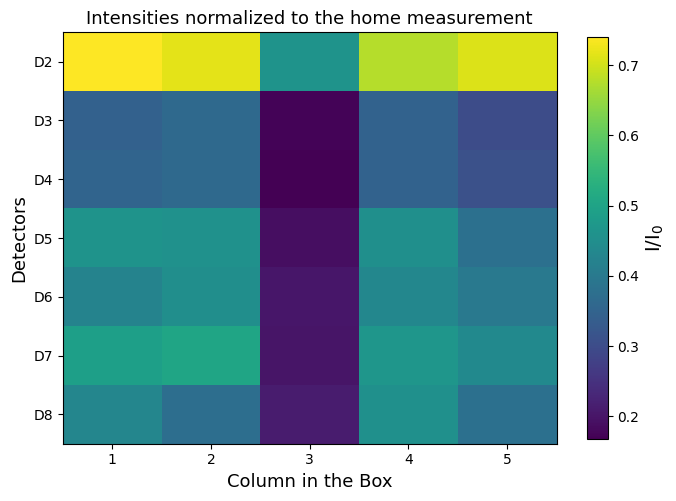

In [63]:
box2 = np.append(d2_box, 0.71)
box3 = np.append(d3_box, 0.3)
box4 = np.append(d4_box, 0.31)
box5 = np.append(d5_box, 0.38)
box6 = np.append(d6_box, 0.4)
box7 = np.append(d7_box, 0.44)
box8 = np.append(d8_box, 0.38)
data = np.array([box2, box3, box4, box5, box6, box7, box8])

# Dimensioni in cm per pixel
pixel_height_cm = 1.5
pixel_width_cm = 1.8

# Calcola il rapporto altezza/larghezza dei pixel
aspect_ratio = (pixel_height_cm / pixel_width_cm) * (data.shape[1] / data.shape[0])

# Crea la figura
plt.figure(figsize=(7, 7))
im = plt.imshow(data, cmap='viridis', aspect=aspect_ratio)

# Aggiungi etichette agli assi
plt.xlabel('Column in the Box', fontsize=13)
plt.ylabel('Detectors', fontsize=13)
plt.title('Intensities normalized to the home measurement', fontsize=13)

# Aggiungi i nomi dei detector (da D2 a D8)
plt.yticks(ticks=np.arange(7), labels=[f'D{i}' for i in range(2, 9)])
plt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5])

# Aggiungi una barra di colore con altezza uguale al grafico
cbar = plt.colorbar(im, shrink=0.6)  # Imposta shrink per adattare l'altezza
cbar.set_label(r'I/I$_0$', fontsize=14)
cbar.ax.tick_params(labelsize=10)

# Mostra il grafico
plt.tight_layout()
plt.savefig('grafici/balckbox.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [64]:
d2_err = np.array([
    2/d2_hm_com[5][0] * np.sqrt(d2_1_fit[5][1]**2 + (d2_hm_com[5][1]/d2_hm_com[5][0])**2),
    2/d2_hm_com[5][0] * np.sqrt(d2_2_fit[5][1]**2 + (d2_hm_com[5][1]/d2_hm_com[5][0])**2),
    2/d2_hm_com[5][0] * np.sqrt(d2_3_fit[5][1]**2 + (d2_hm_com[5][1]/d2_hm_com[5][0])**2),
    2/d2_hm_com[5][0] * np.sqrt(d2_4_fit[5][1]**2 + (d2_hm_com[5][1]/d2_hm_com[5][0])**2)
])

d3_err = np.array([
    2/d3_hm_com[5][0] * np.sqrt(d3_1_fit[5][1]**2 + (d3_hm_com[5][1]/d3_hm_com[5][0])**2),
    2/d3_hm_com[5][0] * np.sqrt(d3_2_fit[5][1]**2 + (d3_hm_com[5][1]/d3_hm_com[5][0])**2),
    2/d3_hm_com[5][0] * np.sqrt(d3_3_fit[5][1]**2 + (d3_hm_com[5][1]/d3_hm_com[5][0])**2),
    2/d3_hm_com[5][0] * np.sqrt(d3_4_fit[5][1]**2 + (d3_hm_com[5][1]/d3_hm_com[5][0])**2)
])

d4_err = np.array([
    2/d4_hm_com[5][0] * np.sqrt(d4_1_fit[5][1]**2 + (d4_hm_com[5][1]/d4_hm_com[5][0])**2),
    2/d4_hm_com[5][0] * np.sqrt(d4_2_fit[5][1]**2 + (d4_hm_com[5][1]/d4_hm_com[5][0])**2),
    2/d4_hm_com[5][0] * np.sqrt(d4_3_fit[5][1]**2 + (d4_hm_com[5][1]/d4_hm_com[5][0])**2),
    2/d4_hm_com[5][0] * np.sqrt(d4_4_fit[5][1]**2 + (d4_hm_com[5][1]/d4_hm_com[5][0])**2)
])

d5_err = np.array([
    2/d5_hm_com[5][0] * np.sqrt(d5_1_fit[5][1]**2 + (d5_hm_com[5][1]/d5_hm_com[5][0])**2),
    2/d5_hm_com[5][0] * np.sqrt(d5_2_fit[5][1]**2 + (d5_hm_com[5][1]/d5_hm_com[5][0])**2),
    2/d5_hm_com[5][0] * np.sqrt(d5_3_fit[5][1]**2 + (d5_hm_com[5][1]/d5_hm_com[5][0])**2),
    2/d5_hm_com[5][0] * np.sqrt(d5_4_fit[5][1]**2 + (d5_hm_com[5][1]/d5_hm_com[5][0])**2)
])

d6_err = np.array([
    2/d6_hm_com[5][0] * np.sqrt(d6_1_fit[5][1]**2 + (d6_hm_com[5][1]/d6_hm_com[5][0])**2),
    2/d6_hm_com[5][0] * np.sqrt(d6_2_fit[5][1]**2 + (d6_hm_com[5][1]/d6_hm_com[5][0])**2),
    2/d6_hm_com[5][0] * np.sqrt(d6_3_fit[5][1]**2 + (d6_hm_com[5][1]/d6_hm_com[5][0])**2),
    2/d6_hm_com[5][0] * np.sqrt(d6_4_fit[5][1]**2 + (d6_hm_com[5][1]/d6_hm_com[5][0])**2)
])

d7_err = np.array([
    2/d7_hm_com[5][0] * np.sqrt(d7_1_fit[5][1]**2 + (d7_hm_com[5][1]/d7_hm_com[5][0])**2),
    2/d7_hm_com[5][0] * np.sqrt(d7_2_fit[5][1]**2 + (d7_hm_com[5][1]/d7_hm_com[5][0])**2),
    2/d7_hm_com[5][0] * np.sqrt(d7_3_fit[5][1]**2 + (d7_hm_com[5][1]/d7_hm_com[5][0])**2),
    2/d7_hm_com[5][0] * np.sqrt(d7_4_fit[5][1]**2 + (d7_hm_com[5][1]/d7_hm_com[5][0])**2)
])

d8_err = np.array([
    2/d8_hm_com[5][0] * np.sqrt(d8_1_fit[5][1]**2 + (d8_hm_com[5][1]/d8_hm_com[5][0])**2),
    2/d8_hm_com[5][0] * np.sqrt(d8_2_fit[5][1]**2 + (d8_hm_com[5][1]/d8_hm_com[5][0])**2),
    2/d8_hm_com[5][0] * np.sqrt(d8_3_fit[5][1]**2 + (d8_hm_com[5][1]/d8_hm_com[5][0])**2),
    2/d8_hm_com[5][0] * np.sqrt(d8_4_fit[5][1]**2 + (d8_hm_com[5][1]/d8_hm_com[5][0])**2)
])

box2_err = np.append(d2_err, d2_err[0])
box3_err = np.append(d3_err, d3_err[0])
box4_err = np.append(d4_err, d4_err[0])
box5_err = np.append(d5_err, d5_err[0])
box6_err = np.append(d6_err, d6_err[0])
box7_err = np.append(d7_err, d7_err[0])
box8_err = np.append(d8_err, d8_err[0])
data_err = np.array([box3_err, box4_err, box5_err, box6_err, box7_err, box8_err]) 

In [68]:
sbb = np.array([4*g+7*h/2, 3*g+5*h/2, 2*g+3*h/2, g+h/2, -h/2, -g-3*h/2]) #allineamento a d7
thetabb_max = []
thetabb_min = []
for i in range(6):
    thetabb_max.append(np.arctan((sbb[i]+h)/l))
    thetabb_min.append(np.arctan(sbb[i]/l))
thetabb_max = np.array(thetabb_max)
thetabb_min = np.array(thetabb_min)
coseno = (2*(thetabb_max-thetabb_min))*(np.log((1+np.sin(thetabb_max))/(1-np.sin(thetabb_max)))-np.log((1+np.sin(thetabb_min))/(1-np.sin(thetabb_min))))

#escludendo d2 che ha evidenti problemi calcoliamo mu di quello che c'è dentro la black box
box_ii0 = np.array([box3[2], box4[2], box5[2], box6[2], box7[2], box8[2]])
err_ii0 = np.array([box3_err[2], box4_err[2], box5_err[2], box6_err[2], box7_err[2], box8_err[2]])

mu_per_xeff = -np.log(box_ii0)

mu_per_xeff_err = 1/box_ii0 * err_ii0

for i in range(len(mu_per_xeff)):
    print(f'detector {i+2}: {mu_per_xeff[i]:.2f} più o meno {mu_per_xeff_err[i]:.2f} ')

coseno


detector 2: 1.75 più o meno 0.02 
detector 3: 1.79 più o meno 0.02 
detector 4: 1.67 più o meno 0.02 
detector 5: 1.59 più o meno 0.02 
detector 6: 1.60 più o meno 0.02 
detector 7: 1.55 più o meno 0.02 


array([0.01243761, 0.01323526, 0.0138587 , 0.01425663, 0.01439352,
       0.01425663])

In [71]:
# Definizione dei materiali con slicing per escludere il primo dato
materials = {
    "piombo": {"mu": mu_pb[1:], "rho": rho_pb, "mu_err": mu_pb_err[1:]},
    "alluminio": {"mu": mu_al[1:], "rho": rho_al, "mu_err": mu_al_err[1:]},
    "ferro": {"mu": mu_iron[1:], "rho": rho_iron, "mu_err": mu_iron_err[1:]},
    "grafite": {"mu": mu_gr[1:], "rho": rho_gr, "mu_err": mu_gr_err[1:]},
    "polietilene": {"mu": mu_poly[1:], "rho": rho_poly, "mu_err": mu_poly_err[1:]},
}

xbb = {}
xbb_err = {}

# Calcolo di xbb e xbb_err per ogni materiale
for materiale, props in materials.items():
    mu = props["mu"]
    rho = props["rho"]
    mu_err = props["mu_err"]
    
    xbb[materiale] = mu_per_xeff * coseno / (mu * rho)
    xbb_err[materiale] = coseno / (rho * mu) * np.sqrt(mu_per_xeff_err**2 + (mu_err / mu)**2)

# Funzione per calcolare la media pesata e la sua incertezza
def media_pesata(valori, incertezze):
    somma_valori = np.sum(valori / incertezze**2)
    somma_incertezze = np.sum(1 / incertezze**2)
    media = somma_valori / somma_incertezze
    errore_media = np.sqrt(1 / somma_incertezze)
    return media, errore_media

# Calcolo della media pesata per ciascun materiale
for materiale in materials.keys():
    valori = xbb[materiale]
    incertezze = xbb_err[materiale]
    media, errore = media_pesata(valori, incertezze)
    print(f"Media pesata x0 per {materiale} = {media} ± {errore}")



Media pesata x0 per piombo = 0.14354338597447153 ± 0.000917964735607482
Media pesata x0 per alluminio = 1.069653271167229 ± 0.008527914369395647
Media pesata x0 per ferro = 0.1539580485143541 ± 0.0009022792305101882
Media pesata x0 per grafite = 1.6991386948196918 ± 0.018447277835401024
Media pesata x0 per polietilene = 1.2954081515763085 ± 0.011660242579722186


{'piombo': array([0.14485597, 0.15446469, 0.14959295, 0.13985985, 0.13737282,
        0.13614071]),
 'alluminio': array([1.12834688, 1.15414273, 1.09765316, 1.03016961, 0.98763226,
        1.05040845]),
 'ferro': array([0.13840465, 0.16251679, 0.14914586, 0.16229844, 0.16920719,
        0.15187993]),
 'grafite': array([1.79208035, 1.83305021, 1.74333149, 1.63615174, 1.56859241,
        1.66829577]),
 'polietilene': array([1.39752851, 1.69140104, 1.18371315, 1.33724414, 1.27097749,
        1.15967784])}